## Part 1

In [1]:
import dask.dataframe as dd

youtube = dd.read_csv('*.csv')

In [2]:
youtube.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [18]:
youtube.describe()

,CLASS
npartitions=1,
,float64
,...


In [7]:
youtube.shape # number of columns

(Delayed('int-f109d988-9846-40ef-92b0-948eb31684e3'), 5)

In [8]:
len(youtube) # number of rows

1956

Get the number of spam vs. legitimate comments

In [19]:
youtube.groupby('CLASS').count().compute()

,COMMENT_ID,AUTHOR,DATE,CONTENT,lower_case,contains_spam
CLASS,,,,,,
0,951,951,951,951,951,951
1,1005,1005,760,1005,1005,1005


Class of 0 contains legitimate comments vs. class of 1 containing spam comments.

Now, we find the number of spam comments that contained the word "check"

TO make it easier, we will convert all the words in comments to lower case
And then we will find the comments with word 'check' in it. 

In [10]:
# get the counts of spam ( 1005 ) and counts of legitimate comments (951)

# change the word spam to lowers case 

youtube['lower_case'] = youtube['CONTENT'].apply(str.lower)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/dask/dataframe/core.py:2345: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('CONTENT', 'object'))

  warnings.warn(meta_warning(meta))


In [11]:
youtube.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,lower_case
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,"huh, anyway check out this you[tube] channel: ..."
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,just for test i have to say murdev.com
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch?v=vtarggvgtwq check this out .﻿


In [13]:
youtube['contains_spam'] = youtube['lower_case'].apply(lambda x: 'check' in x)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/dask/dataframe/core.py:2345: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('lower_case', 'bool'))

  warnings.warn(meta_warning(meta))


In [14]:
youtube.groupby(['contains_spam', 'CLASS']).count().compute()


COMMENT_ID  AUTHOR  DATE  CONTENT  lower_case
contains_spam CLASS                                               
False         0             932     932   932      932         932
              1             544     544   466      544         544
True          0              19      19    19       19          19
              1             461     461   294      461         461

So, the comment was spam and had word 'check' occured 461 times vs. when the comment contained 'check' but wasn't a spam happened 19 times.


### bonus: create visualizations


Text(0, 0.5, 'Number of spam comments')

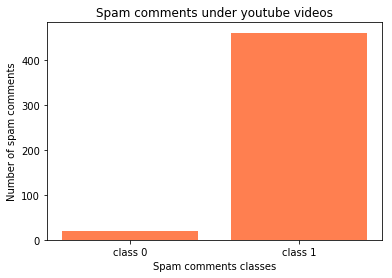

In [39]:
import matplotlib.pyplot as plt

table = youtube.groupby(['contains_spam', 'CLASS']).count().compute()

spams = [19, 461]

plt.bar(x = ['class 0', 'class 1'], height = spams, color = 'coral')
plt.title('Spam comments under youtube videos')
plt.xlabel('Spam comments classes')
plt.ylabel('Number of spam comments')

Big Data Options

Learning to use SageMaker and JupyterLab was a good start this week because I had not used it before. The opportunity to use Dask with huge datasets was also a good because it supports pandas and numpy data structures and you can use it to scale up to be run on a cluster.

I am also liking SQL so far. I personally like to explore my data before moving on to whether it's modeling or visualizations. Since SQL lets me make querying easy and fast, especially using the DB Browser, it is easier to explore my data. Learning the Syntax was a bit complicated because it seemed too easy to be true but once you understand what you are trying to get and from which tables, whether you need to do JOIN or can simply query one table, it becomes easier from there. I haven't had a chance to really explore Numba but I think it is better for loops or any program that takes a while to run, and you can run it in a much shorter time too.